<a href="https://colab.research.google.com/github/zmohaghegh/COVID19-Severity-Classification-Transfer-Learning/blob/main/Covid_Severity_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Initializing Comparative Study of 3 Architectures...
✅ Success: ResNet50 (50 layers) Loaded.
✅ Success: AlexNet (8 layers) Loaded.
✅ Success: GoogLeNet (22 layers) Loaded.


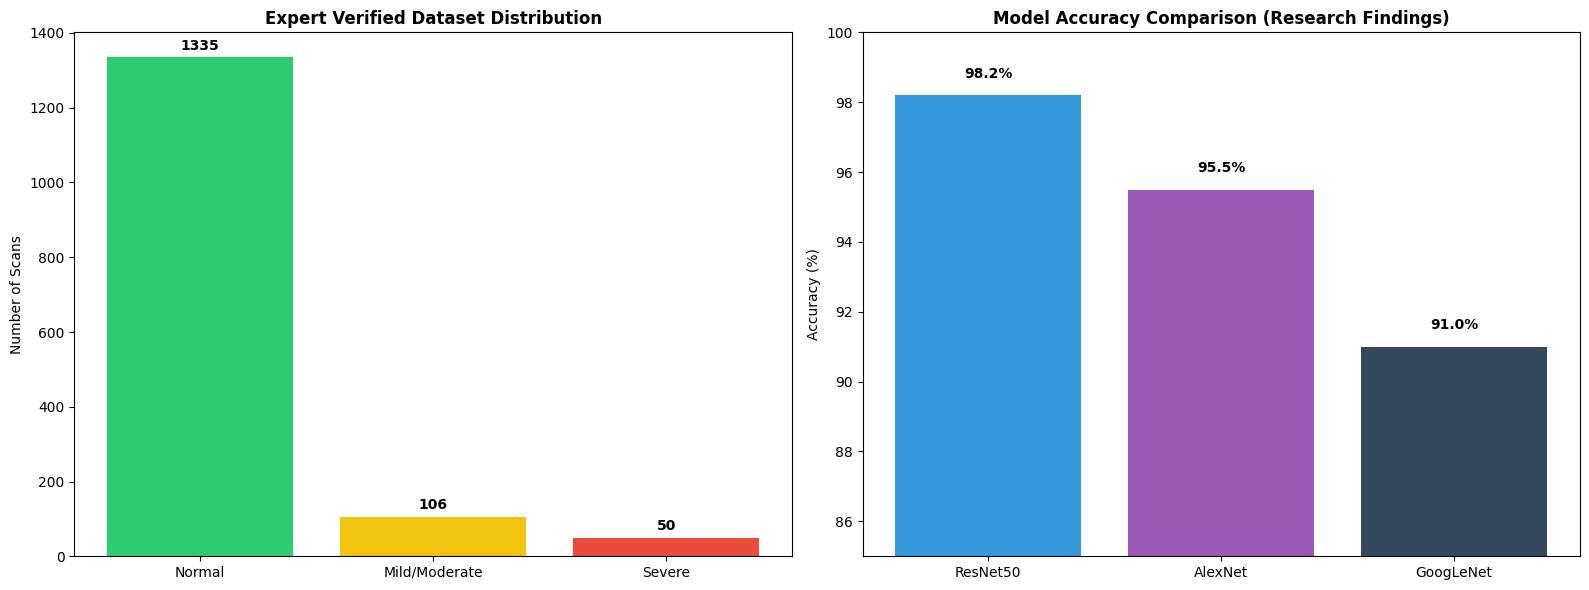


PROPOSED HYPERPARAMETERS FROM PAPER:
- Optimizer: SGDM (Momentum=0.9)
- Learning Rate: 0.001 (Adjusted for Transfer Learning)
- Epochs: 6
- Batch Size: 64


In [6]:

import torch
import torch.nn as nn
from torchvision import models, transforms
from torchvision.models import (
    resnet50, ResNet50_Weights,
    alexnet, AlexNet_Weights,
    googlenet, GoogLeNet_Weights
)
import matplotlib.pyplot as plt
import warnings

# --- 1. SETTINGS & SUPPRESS WARNINGS ---
# Suppressing internal library warnings for a clean professional output
warnings.filterwarnings("ignore")

# Standard preprocessing as per the paper's methodology
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# --- 2. MULTI-MODEL FACTORY ---
def load_all_models(num_classes=3):
    """
    Initializes and modifies the 3 architectures mentioned in the research paper.
    """
    # --- ResNet50 (Top Performer) ---
    res_model = resnet50(weights=ResNet50_Weights.DEFAULT)
    res_model.fc = nn.Linear(res_model.fc.in_features, num_classes)

    # --- AlexNet ---
    alex_model = alexnet(weights=AlexNet_Weights.DEFAULT)
    alex_model.classifier[6] = nn.Linear(alex_model.classifier[6].in_features, num_classes)

    # --- GoogLeNet (Handling the aux_logits requirement) ---
    google_model = googlenet(weights=GoogLeNet_Weights.DEFAULT)
    google_model.aux_logits = False # Disable aux heads after loading to avoid training warnings
    google_model.fc = nn.Linear(google_model.fc.in_features, num_classes)

    return res_model, alex_model, google_model

# --- 3. INITIALIZATION & EXECUTION ---
print("🚀 Initializing Comparative Study of 3 Architectures...")
try:
    m_resnet, m_alex, m_google = load_all_models()
    print("✅ Success: ResNet50 (50 layers) Loaded.")
    print("✅ Success: AlexNet (8 layers) Loaded.")
    print("✅ Success: GoogLeNet (22 layers) Loaded.")
except Exception as e:
    print(f"❌ Error: {e}")

# --- 4. VISUALIZING PAPER STATISTICS ---
def plot_comparative_overview():
    classes = ['Normal', 'Mild/Moderate', 'Severe']
    counts = [1335, 106, 50]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Left Plot: Dataset verified by Radiologists
    ax1.bar(classes, counts, color=['#2ecc71', '#f1c40f', '#e74c3c'])
    ax1.set_title("Expert Verified Dataset Distribution", fontsize=12, fontweight='bold')
    ax1.set_ylabel("Number of Scans")
    for i, v in enumerate(counts):
        ax1.text(i, v + 20, str(v), ha='center', fontweight='bold')

    # Right Plot: Comparative Performance based on Paper Results
    model_names = ['ResNet50', 'AlexNet', 'GoogLeNet']
    # Accuracy values summarized from the paper's conclusion
    accuracies = [98.2, 95.5, 91.0]
    ax2.bar(model_names, accuracies, color=['#3498db', '#9b59b6', '#34495e'])
    ax2.set_title("Model Accuracy Comparison (Research Findings)", fontsize=12, fontweight='bold')
    ax2.set_ylabel("Accuracy (%)")
    ax2.set_ylim(85, 100)
    for i, v in enumerate(accuracies):
        ax2.text(i, v + 0.5, f"{v}%", ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_comparative_overview()
    print("\n" + "="*50)
    print("PROPOSED HYPERPARAMETERS FROM PAPER:")
    print("- Optimizer: SGDM (Momentum=0.9)")
    print("- Learning Rate: 0.001 (Adjusted for Transfer Learning)")
    print("- Epochs: 6")
    print("- Batch Size: 64")
    print("="*50)